## Name:-Rajpurohit Bhavesh

## TASK 2: Prediction using Unsupervised ML
### Objective: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

###### Dataset : https://bit.ly/3kXTdox

### Importing the Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

### Loading the Dataset

In [6]:
# Reading dataset
data = pd.read_csv(r"Iris.csv")
print("Data imported successfully")
data.head(7)

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [7]:
data.tail(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
##Shape of the data set
data.dtypes ,  data.shape

(Id                 int64
 SepalLengthCm    float64
 SepalWidthCm     float64
 PetalLengthCm    float64
 PetalWidthCm     float64
 Species           object
 dtype: object,
 (150, 6))

In [15]:
#Statistical description
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
## Checking unique values of species column
data1= data["Species"].unique()
data1

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

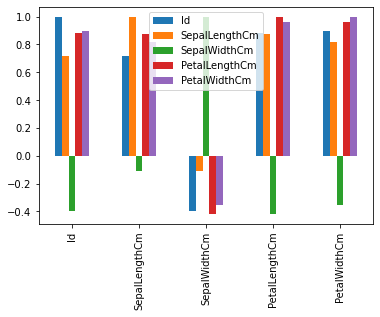

In [24]:
data.corr().plot(kind = 'bar')

###  Splitting the dataset

In [17]:
X = scale(data.iloc[:,1:5])
y = data.iloc[:,5]

In [21]:
#Now counting the number of different species
y.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

## Predicting the optimum number of clusters using the elbow method.

In [38]:
WCSS = []  # creating empty list to store my variables.
for i in range(1,11):
    clustering = KMeans(n_clusters=i, random_state=0)
    clustering.fit(X)
    WCSS.append(clustering.inertia_)  #calculating squared error for clustered pts.

### Plotting the result on line graph


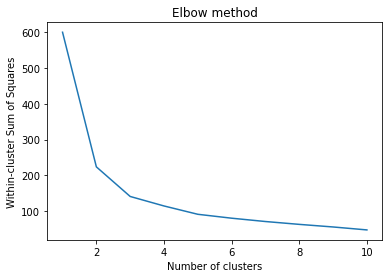

In [40]:
plt.plot(range(1,11),WCSS)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares') # Within cluster sum of squares
plt.show()

## Using the Algorithm fit the model with optimum number of clusters.

In [44]:
KMeans_Clustering = KMeans(n_clusters =3, random_state=0)
KMeans_Clustering.fit(X)

KMeans(n_clusters=3, random_state=0)

### Creating the K Means Classifier


In [47]:
kmeans = KMeans(n_clusters= 3, init = "k-means++",max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

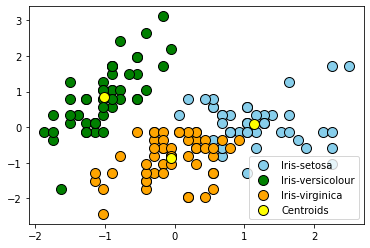

In [48]:
# Visualising the clusters - On the first two columns

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, 
            c = 'SkyBlue', edgecolors = 'black',label = 'Iris-setosa')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, 
            c = 'Green', edgecolors = 'black', label = 'Iris-versicolour')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, 
            c = 'Orange', edgecolors = 'black', label = 'Iris-virginica')


# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow',edgecolors = 'black', label = 'Centroids')

plt.legend()
